In [29]:
%matplotlib inline
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = yf.download('AAPL', start="2020-12-01")

[*********************100%***********************]  1 of 1 completed


In [25]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-01,121.010002,123.469299,120.010002,122.720001,121.968102,128166803
2020-12-02,122.019997,123.370003,120.889999,123.080002,122.325890,89004195
2020-12-03,123.519997,123.779999,122.209999,122.940002,122.186752,78967630
2020-12-04,122.599998,122.860802,121.519997,122.250000,121.500969,78260421
2020-12-07,122.309998,124.570000,122.250000,123.750000,122.991776,86711990
...,...,...,...,...,...,...
2021-12-06,164.289993,167.879898,164.279999,165.320007,165.320007,107496982
2021-12-07,169.080002,171.580002,168.339996,171.179993,171.179993,120405352
2021-12-08,172.125000,175.960007,170.699997,175.080002,175.080002,116998901


In [26]:
def strat(df, window=100):
    """Buys or sells depending on whether or not the rolling returns are positive or not.
    Works better on cryptos than equities"""
    df.copy()
    df['ret'] = np.log(df.Close.pct_change()+1) #log returns day to day
    #look back window 
    df['prior_n'] = df.ret.rolling(window).sum() #sum because of log returns 
    df.dropna(inplace = True)
    df['position'] = [1 if i > 0 else -1 for i in df.prior_n]
    df['strat'] = df.position.shift(1) * df.ret
    #you can only buy or sell on the next day
    return np.exp(df[['ret','strat']].cumsum()).plot(figsize=(12,6))

<AxesSubplot:xlabel='Date'>

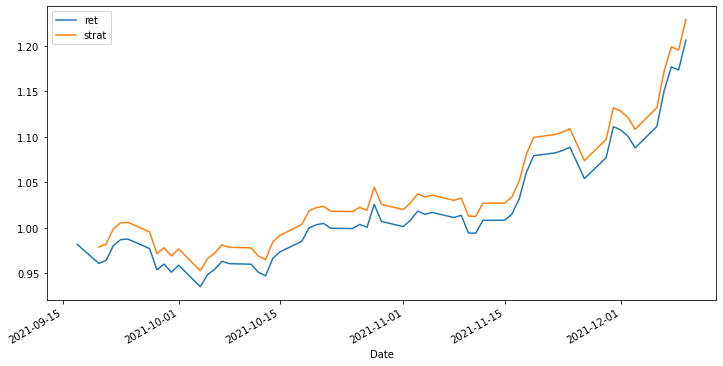

In [30]:
strat(df)

In [28]:
type(x)

matplotlib.axes._subplots.AxesSubplot